<a href="https://colab.research.google.com/github/meligurevich/IAAA1/blob/main/TP1_AA1_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP1 AA1

**CONSTANZA VILLARREAL**

## Indicaciones básicas

0) Debe usar este notebook como template para su entrega. Haga una copia y comience a completar las consignas.

1) Cada uno debe completar las consignas indicadas en este notebook.

2)
3) No pueden repetir el mismo dataset que ya haya definido un compañero.

4) copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7) Revise las fecha límite de entrega de este trabajo

# ENTREGA

* En el foro destinado a la tarea debe postear al menos tres veces:
  - La primera vez para indicar el dataset elegido
  - Una segunda vez para postear su entrega
  - Una tercera vez para brindar feedback a alguien más en el foro.
  - Puede comentar más de un posteo de sus compañeros siempre y cuando el intercambio sea respetuoso y fructífero.
* Deben postear como solución un enlace a su notebook colab público y también un enlace al mismo notebook alojado en su repositorio GitHub.
* Debe sumar el enlace a un video donde muestre su solución y explique lo realizado. Duración máxima: 5 minutos. Puede grabarse a Ud. mismo usando una sesión de zoom y grabar localmente. Puede subir el video a su youtube personal como privado o Unlisted.
* Enlaces no accesibles o enlaces erróneos es igual a determinar que la tarea no ha sido entregada. Corrobore la viabilidad de los enlaces que postea.


#**Tarea: Aplicación de Regresión Lineal y Análisis de Importancia de Variables**  
**Objetivo**: Aplicar un modelo de regresión lineal a un dataset de su elección, evaluar su rendimiento e identificar las variables más relevantes para la predicción.

---

# **Instrucciones**:

#1. **Selección del Dataset**  
   - Elijan un dataset de UCI ML Repository del siguiente enlace: https://archive.ics.uci.edu/datasets/?Task=Regression&skip=0&take=10&sort=desc&orderBy=NumHits&search=  
   - Requisitos:  
     - Debe tener al menos 4 variables numéricas continuas (1 target, 3 o más features).  
     - Idealmente, que las features tengan distintas escalas o unidades ( no excluyente).
     - Revisar en el foro de la tarea que dicho dataset no haya sido ya elegido por otra persona.
     - Postee en el foro de la tarea el dataset que eligió. Continue al siguiente punto.  



DATASET a utilizar: [Computer Hardware](https://archive.ics.uci.edu/dataset/29/computer+hardware)

## Resolución:


## 2. **Análisis exploratorio (previo al modelado)**  
   - Describan las variables (media, distribución, outliers).  
   - Visualizen:  
     - Histogramas o boxplots para ver distribuciones.  
     - Gráficos de dispersión (scatterplots) entre features y target.  
   - **Pregunta clave**: ¿Qué relaciones lineales preliminares observan?  


In [ ]:
# Cargar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv("machine.data")

# Mostrar las primeras filas del dataset para ver las variables
print(df.head())

  adviser    32/60  125   256   6000  256.1  16  128  198  199
0  amdahl   470v/7   29  8000  32000     32   8   32  269  253
1  amdahl  470v/7a   29  8000  32000     32   8   32  220  253
2  amdahl  470v/7b   29  8000  32000     32   8   32  172  253
3  amdahl  470v/7c   29  8000  16000     32   8   16  132  132
4  amdahl   470v/b   26  8000  32000     64   8   32  318  290


1. Importo las librerías necesarias:

* *pandas* para manejar datos en formato de tablas.

* *numpy* para trabajar con arreglos numéricos.

* *matplotlib.pyplot* y seaborn para crear gráficos.

2. Cargo el dataset:

* Lee el archivo "machine.data" que contiene los datos y lo guarda en el DataFrame *df*.

3. Muestro las primeras filas del dataset:

* Usa *df.head()* para imprimir las primeras 5 filas del archivo, lo cual te permite ver las variables y una pequeña muestra de los datos.

In [ ]:
# Como las columnas no tienen nombres les asigno uno
df.columns = ['VendorName', 'ModelName', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']

# Mostrar las primeras filas con nombres de columnas asignados
print(df.head())

  VendorName ModelName  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP  ERP
0     amdahl    470v/7    29  8000  32000    32      8     32  269  253
1     amdahl   470v/7a    29  8000  32000    32      8     32  220  253
2     amdahl   470v/7b    29  8000  32000    32      8     32  172  253
3     amdahl   470v/7c    29  8000  16000    32      8     16  132  132
4     amdahl    470v/b    26  8000  32000    64      8     32  318  290


1. Asigno nombres a las columnas:

* Como el dataset no tiene nombres de columnas, se les asigna un nombre descriptivo a cada una de las columnas utilizando *df.columns*.

* Los nombres que asigna son: 'VendorName', 'ModelName', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP'.

2. Muestro las primeras filas con los nombres de las columnas asignados:

* Usa *df.head()* para mostrar las primeras 5 filas del dataset con los nuevos nombres de columnas.

Es útil para poder trabajar con el dataset de manera más clara, ya que ahora puedes referirte a las columnas por su nombre en lugar de por índices numéricos

In [ ]:
# Descripción estadística de las variables numéricas
print(df.describe())

              MYCT          MMIN          MMAX        CACH       CHMIN  \
count   208.000000    208.000000    208.000000  208.000000  208.000000   
mean    204.201923   2880.538462  11824.019231   24.096154    4.644231   
std     260.833016   3883.839300  11747.916663   37.417999    6.787198   
min      17.000000     64.000000     64.000000    0.000000    0.000000   
25%      50.000000    768.000000   4000.000000    0.000000    1.000000   
50%     110.000000   2000.000000   8000.000000    8.000000    2.000000   
75%     225.000000   4000.000000  16000.000000   32.000000    6.000000   
max    1500.000000  32000.000000  64000.000000  256.000000   52.000000   

            CHMAX          PRP          ERP  
count  208.000000   208.000000   208.000000  
mean    17.740385   105.177885    98.850962  
std     24.913375   161.090223   154.974961  
min      0.000000     6.000000    15.000000  
25%      5.000000    27.000000    28.000000  
50%      8.000000    49.500000    45.000000  
75%     24.

Muestra una descripción estadística de las variables numéricas:

* df.describe() genera un resumen con estadísticas descriptivas de las columnas numéricas del dataset.

* Entre las estadísticas que muestra están:

  * Count: Número de valores no nulos.

  * Mean: Promedio de los valores.

  * Std: Desviación estándar, que indica la dispersión de los valores.

  * Min: Valor mínimo.

  * 25%: Cuartil 1 (el 25% de los valores son menores a este valor).

  * 50%: Mediana (el 50% de los valores son menores a este valor).

  * 75%: Cuartil 3 (el 75% de los valores son menores a este valor).

  * Max: Valor máximo.

In [ ]:
# Verificar valores faltantes
print(df.isnull().sum())

VendorName    0
ModelName     0
MYCT          0
MMIN          0
MMAX          0
CACH          0
CHMIN         0
CHMAX         0
PRP           0
ERP           0
dtype: int64


Verifica la presencia de valores faltantes en el dataset:

* *df.isnull().sum()* suma los valores True (que representan los valores faltantes) por cada columna, mostrando cuántos valores faltantes hay en cada una de las columnas del dataset.

Este paso es importante porque te permite identificar qué columnas tienen datos faltantes y cuántos, lo cual es útil para decidir cómo manejar esos valores (por ejemplo, imputándolos, eliminándolos, etc.).

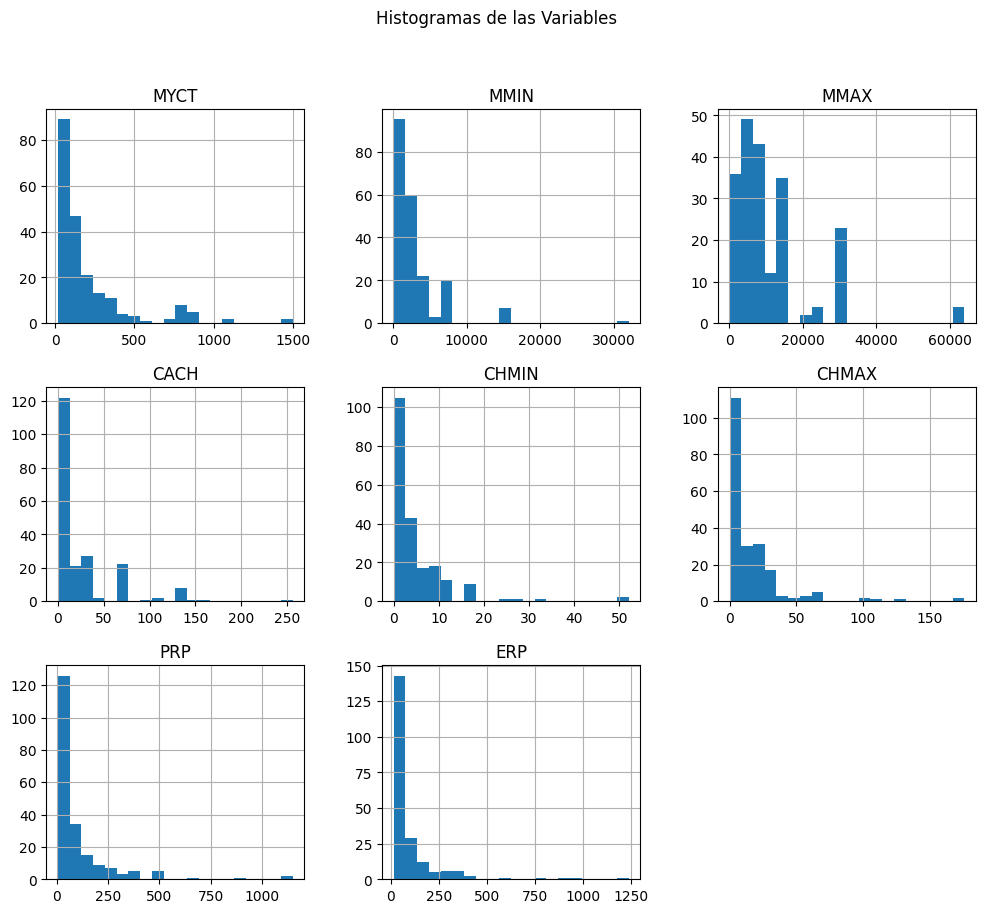

In [ ]:
# Visualización de histogramas para cada variable numérica
df.hist(figsize=(12, 10), bins=20)
plt.suptitle("Histogramas de las Variables")
plt.show()

Genera histogramas para cada variable numérica en el dataset:

* *df.hist(figsize=(12, 10), bins=20)* crea un histograma para cada columna numérica del DataFrame *df*.

  * *figsize=(12, 10)* define el tamaño de la figura que contendrá todos los histogramas.

  * *bins=20* establece que cada histograma tendrá 20 barras (o intervalos) para representar la distribución de los datos.

* *plt.suptitle("Histogramas de las Variables")* agrega un título general para todos los histogramas.

* *plt.show()* muestra los gráficos generados.

Los histogramas permiten visualizar la distribución de los datos en cada variable numérica, ayudando a identificar patrones, sesgos, distribuciones simétricas o asimétricas, y la presencia de posibles valores atípicos (outliers)

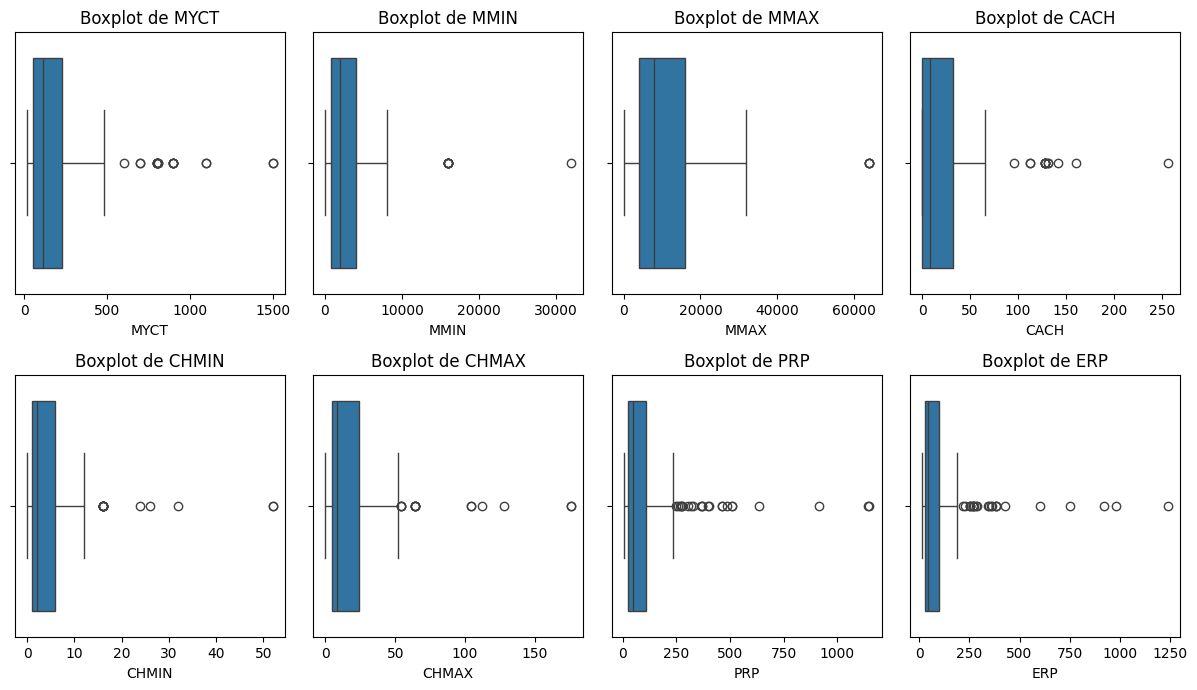

In [ ]:
# Boxplots para detectar outliers
plt.figure(figsize=(12, 10))
for i, col in enumerate(df.columns[2:]):  # Excluimos las columnas categóricas
    plt.subplot(3, 4, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
plt.tight_layout()
plt.show()

Genera boxplots para cada variable numérica en el dataset:

* *plt.figure(figsize=(12, 10))* establece el tamaño de la figura para mostrar todos los boxplots.

* *for i, col in enumerate(df.columns[2:])*: se recorre cada columna numérica en el dataset (se excluyen las dos primeras columnas, que son categóricas).

  * *df.columns[2:]* selecciona todas las columnas a partir de la tercera, que son las variables numéricas.

* *plt.subplot(3, 4, i + 1)* organiza los boxplots en una cuadrícula de 3 filas y 4 columnas, y coloca cada gráfico en la posición correspondiente.

* *sns.boxplot(x=df[col])* genera un boxplot para cada columna col, mostrando su distribución, valores centrales, y cualquier valor atípico (outliers) que pueda existir.

* *plt.title(f"Boxplot de {col}")* añade un título al boxplot correspondiente a cada variable.

* *plt.tight_layout()* ajusta el espacio entre los gráficos para que se vean de manera ordenada.

* *plt.show()* muestra todos los boxplots generados.

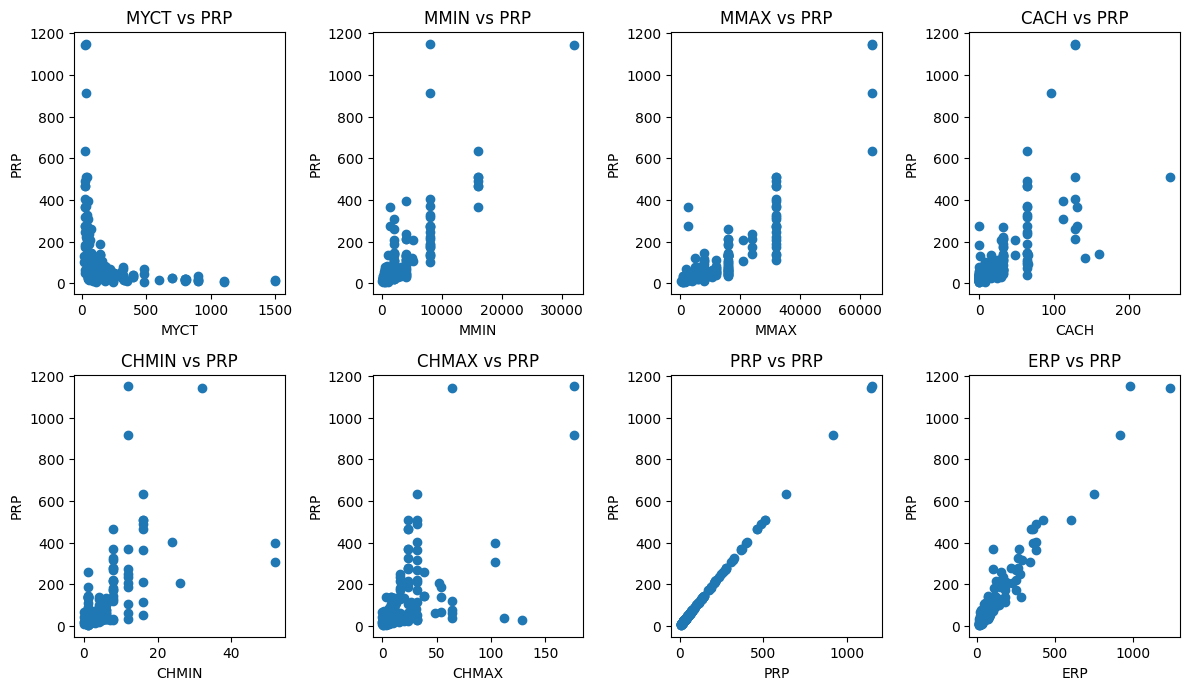

In [ ]:
# Gráficos de dispersión entre las características y el PRP
plt.figure(figsize=(12, 10))
for i, col in enumerate(df.columns[2:]):  # Excluimos las columnas categóricas
    plt.subplot(3, 4, i + 1)
    plt.scatter(df[col], df['PRP'])  # 'PRP' es el nombre del objetivo
    plt.title(f"{col} vs PRP")
    plt.xlabel(col)
    plt.ylabel('PRP')
plt.tight_layout()
plt.show()

Elegí **PRP (Published Relative Performance)** como objetivo porque es una medida directa del rendimiento de las máquinas, lo que la hace una variable más clara y confiable para predecir. Al ser un valor numérico que refleja el desempeño real, facilita el análisis y modelado de las relaciones con las otras características de las máquinas. Esto hace que sea una opción más sencilla y adecuada para construir un modelo de regresión.










In [ ]:
# Codificación de las variables categóricas con One-Hot Encoding
#df_encoded = pd.get_dummies(df, columns=['VendorName', 'ModelName'])
#print(df_encoded.head())

En base a los gráficos de dispersión y la descripción estadística, se puede concluir preliminarmente que existen **relaciones lineales positivas** entre 'PRP' y las variables 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX'. La relación es más fuerte para 'MYCT', 'MMIN', 'MMAX'. La variable 'ERP' muestra una relación más débil o posiblemente no lineal con 'PRP'.

Es importante tener en cuenta que estas *son observaciones preliminares*.

**Conclusión del Análisis:**

* MYCT, MMIN, MMAX, CACH, CHMIN, CHMAX: Estas variables muestran una distribución que se asemeja a una distribución exponencial o similar, donde la mayoría de las máquinas tienen un valor bajo y hay algunas con valores muy altos, esto se puede asociar con distintos tipos de máquinas.
* PRP, ERP: Estas variables, por el contrario, muestran una distribución ligeramente más simétrica, con valores más concentrados en un rango medio, con algo de sesgo hacia la izquierda.
* Outliers: De acuerdo con los boxplots, los datos pueden contener outliers, esto coincide con las formas de los histogramas previamente mencionadas. Por ejemplo, en las variables MYCT, MMIN, MMAX, CACH, CHMIN, CHMAX, se observa un sesgo a la derecha que coincide con los outliers.

## 3. **Preprocesamiento**  
   - Limpieza: Manejen missing values (eliminar, imputar) y outliers (si es necesario).  
   - Limpieza: indique cuáles features descarta. Justifique.
   - Indique si usará o no variables categóricas. Justifique. Realice su preprocesamiento adeucado.
   - Escalen las features (p.ej., StandardScaler) para comparar coeficientes después.  
   - Dividan en train/test (70-30 o 80-20).  

**1. Limpieza de datos**

¿Hay valores faltantes? Ya verificamos con df.isnull().sum() y vimos que no hay valores faltantes, así que no es necesario eliminar ni imputar datos.

¿Qué pasa con los outliers? En los boxplots ya visualicé que hay algunos outliers. Por ahora no los eliminaré, a menos que luego vea que afectan mucho al modelo. Se pueden dejar si no son errores.

**2. Selección de features**

Voy a descartar las variables categóricas: VendorName y ModelName. La justificación es porque tienen muchos valores únicos y no aportan directamente al rendimiento numérico (PRP). Además, mi objetivo es simplificar el modelo en esta etapa.

**3. Variables categóricas**

No usaré variables categóricas por ahora, para mantener un modelo sencillo de regresión lineal.

**4. Escalado de las features**

Usaré StandardScaler para estandarizar las variables numéricas.

¿Por qué? Porque quiero que todas las features tengan una escala similar. Esto:

* Mejora el rendimiento de algunos modelos.

* Permite comparar los coeficientes más fácilmente.

**5. División en conjunto de entrenamiento y prueba**

Usaré una división 80-20:

* 80% de los datos para entrenar el modelo.

* 20% para evaluarlo.


In [ ]:
# Importo las librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Elimino columnas categóricas que no voy a usar
df_num = df.drop(columns=['VendorName', 'ModelName'])  # Solo dejo variables numéricas

# Separo features (X) y target (y)
X = df_num.drop(columns=['PRP'])  # Todas las columnas menos PRP
y = df_num['PRP']  # Esta es nuestra variable objetivo

# Escalar las variables con StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División en entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Mostrar para confirmar
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)


Forma de X_train: (166, 7)
Forma de X_test: (42, 7)


Ese resultado confirma que todo salió bien:

* Tengo 166 muestras para entrenamiento.

* Y 42 muestras para testeo.

* Cada una con 7 features numéricas (ya sin las categóricas y sin la columna PRP que es tu objetivo).




## 4. **Regresión Lineal**  
   - Ajusten un modelo de regresión lineal (usando `sklearn.linear_model.LinearRegression`).  
   - Obtengan:  
     - Coeficientes (pesos) del modelo.  
     - Evaluar métricas en el set de entrenamiento y en el de testeo: **R²**, MSE (error cuadrático medio), MAE.  


In [ ]:
# 1. Importamos las librerías necesarias para crear el modelo y medir su rendimiento
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

Estas bibliotecas nos permiten crear el modelo de regresión lineal y calcular métricas como R², MSE y MAE.

In [ ]:
# 2. Creamos un objeto del modelo de regresión lineal
modelo = LinearRegression() #Acá creamos el modelo vacío, aún no está entrenado

In [ ]:
# 3. Entrenamos (ajustamos) el modelo usando los datos de entrenamiento
modelo.fit(X_train, y_train) #El modelo aprende la relación entre las variables predictoras (X_train) y el objetivo (y_train)

LinearRegression()

In [ ]:
# 4. Mostramos el intercepto (ordenada al origen) y los coeficientes del modelo
print("Intercepto:", modelo.intercept_)
print("Coeficientes:", modelo.coef_)

Intercepto: 107.12882676441338
Coeficientes: [ -1.00626742   8.60366237 -16.62166968  30.87812251  -9.42625774
  11.41344583 145.64561976]


Esto muestra el peso que el modelo asignó a cada variable. Nos permite interpretar la influencia de cada una en la predicción.

In [ ]:
# 5. Hacemos predicciones con el modelo para el conjunto de entrenamiento y test
y_train_pred = modelo.predict(X_train)
y_test_pred = modelo.predict(X_test)

# El modelo ya entrenado predice los valores de PRP tanto en entrenamiento como en prueba.

In [ ]:
# 6. Calculamos métricas de rendimiento para el conjunto de entrenamiento
r2_train = r2_score(y_train, y_train_pred)             # Qué tan bien ajusta el modelo (1 es perfecto)
mse_train = mean_squared_error(y_train, y_train_pred)  # Error cuadrático medio (penaliza errores grandes)
mae_train = mean_absolute_error(y_train, y_train_pred) # Error absoluto medio (promedio del error)

# 7. Calculamos métricas para el conjunto de prueba (test)
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

Estas métricas me permiten ver si el modelo funciona bien o si está sobreajustado (memoriza entrenamiento y falla en test)

In [ ]:
# 8. Mostramos los resultados
print("Train - R²:", r2_train)
print("Train - MSE:", mse_train)
print("Train - MAE:", mae_train)

print("Test - R²:", r2_test)
print("Test - MSE:", mse_test)
print("Test - MAE:", mae_test)

#Comparamos rendimiento en entrenamiento y prueba. Si las métricas son parecidas, el modelo generaliza bien.

Train - R²: 0.9606825792330811
Train - MSE: 971.9843490474103
Train - MAE: 20.663060956171257
Test - R²: 0.83294410365559
Test - MSE: 5008.167201262841
Test - MAE: 38.181509741501884


**Resultados del modelo**

**Conjunto de Entrenamiento (Train):**
* R² = 0.96 → El modelo explica el 96% de la variabilidad en los datos de entrenamiento. Muy buen ajuste.

* MSE = 971.98 → Error cuadrático medio. En promedio, el modelo se equivoca bastante poco, aunque penaliza más los errores grandes.

* MAE = 20.66 → Error absoluto medio. En promedio, el modelo se equivoca por unas 21 unidades de PRP.

**Conjunto de Prueba (Test):**
* R² = 0.83 → El modelo explica el 83% de la variabilidad en datos nuevos. Es una buena generalización.

* MSE = 5008.17 → Este error es mayor que en entrenamiento, lo cual es normal, pero hay que observarlo.

* MAE = 38.18 → El error promedio subió, pero sigue dentro de un rango razonable.

**¿Qué significa esto?**

* El modelo aprendió bien los datos de entrenamiento y también funciona bien en datos nuevos.

* Hay algo de diferencia entre train y test, pero no parece estar sobreajustado.

* El modelo puede ser útil para predecir el rendimiento relativo (PRP) a partir de las características de la computadora.


## 5. **Importancia de Variables**  
   - Analicen los **coeficientes** del modelo:  
     - Valores absolutos altos → mayor impacto en el target.  
     - Signo: Relación positiva/negativa con el target.  
   - Comparen la magnitud de los coeficientes **escalados** (si usaron features en distintas unidades).  
   - **5.1. Opcional**:
     Otra forma es "desordenar" un feature y ver cómo empeora el modelo. Si al desordenarlo el error aumenta mucho, ese feature era importante. Usen métodos como:  
     - **Permutation Importance** (de sklearn) para validar importancia. Más info en https://scikit-learn.org/stable/modules/permutation_importance.html



In [ ]:
# Como habia guardado los nombres de las columnas antes del escalado
feature_names = ['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'ERP']  # actualizar si lo llego a cambiar

# Ver los coeficientes
coeficientes = pd.Series(modelo.coef_, index=feature_names)
print(coeficientes.sort_values(ascending=False))

ERP      145.645620
CACH      30.878123
CHMAX     11.413446
MMIN       8.603662
MYCT      -1.006267
CHMIN     -9.426258
MMAX     -16.621670
dtype: float64


**Interpretación de los coeficientes:**
* ERP (145.65): Es la variable con el mayor coeficiente positivo. Esto significa que, a medida que aumenta el valor de ERP, el PRP (rendimiento relativo publicado) también aumenta, lo que indica una relación positiva fuerte entre estas dos variables.

* CACH (30.88): Esta variable también tiene un coeficiente positivo. Un aumento en CACH (memoria caché) también aumenta el PRP, aunque no tanto como el ERP.

* CHMAX (11.41): Tiene un coeficiente positivo, lo que indica que un mayor número de canales máximos mejora el PRP, pero el impacto es menor comparado con ERP y CACH.

* MMIN (8.60): Al igual que las anteriores, un aumento en la memoria mínima también tiene un efecto positivo sobre el PRP, pero es menor en comparación con CACH y ERP.

* MYCT (-1.01): Este coeficiente es negativo, lo que indica que un mayor tiempo de ciclo de la máquina (MYCT) reduce el PRP. Es decir, más tiempo de ciclo implica peor rendimiento relativo.

* CHMIN (-9.43): CHMIN (canales mínimos) tiene un coeficiente negativo, lo que sugiere que menos canales tienden a disminuir el PRP.

* MMAX (-16.62): La memoria máxima tiene un coeficiente negativo, lo que puede ser algo sorprendente a primera vista. Esto sugiere que, en este modelo, un aumento en la memoria máxima está asociado a una reducción en el PRP, lo cual puede deberse a que no hay una relación directa o que el modelo ha aprendido otras interacciones que no son tan evidentes.

**Resumen:**
* Variables con impacto positivo: ERP, CACH, CHMAX, MMIN.

* Variables con impacto negativo: MYCT, CHMIN, MMAX.

* Mayor impacto en PRP: ERP tiene el mayor coeficiente, seguido por CACH.


## 6. **Reflexión**  
   - ¿Cuáles variables son más importantes según el modelo? ¿Coincide con su análisis exploratorio?  
   - ¿El modelo tiene buen rendimiento (R² alto, MSE bajo)? Si no, ¿a qué podría deberse?  



1. 1. ¿Cuáles variables son más importantes según el modelo?

Según los coeficientes obtenidos, las variables más importantes (con mayor impacto en el PRP) son:

* ERP (con un coeficiente de 145.65), que tiene el mayor impacto positivo en el rendimiento relativo publicado (PRP).

* CACH (con un coeficiente de 30.88), también con un impacto positivo, aunque menor que ERP.

Las variables con impacto negativo incluyen:

* MYCT (tiempo de ciclo de la máquina) con un coeficiente de -1.01.

* CHMIN (canales mínimos) con un coeficiente de -9.43.

* MMAX (memoria máxima) con un coeficiente de -16.62.

Las variables que tienen un coeficiente positivo son ERP, CACH, CHMAX, y MMIN, mientras que las negativas son MYCT, CHMIN, y MMAX. En general, ERP y CACH parecen ser las variables más relevantes para predecir el rendimiento, mientras que MMAX tiene un coeficiente negativo que puede parecer sorprendente y debería ser analizado más a fondo (posiblemente debido a interacciones no lineales o efectos colaterales que el modelo ha aprendido).

1. 2. ¿Coincide con su análisis exploratorio?

El análisis exploratorio me permitió observar las distribuciones y las relaciones preliminares entre las características y el objetivo. Al observar los coeficientes y su relación con el PRP:

* En el análisis exploratorio se vio que algunas variables parecían tener una relación directa con el rendimiento, como ERP y CACH, lo cual coincide con los resultados obtenidos en el modelo.

* Sin embargo, algunas variables como MMAX tienen un comportamiento inesperado (coeficiente negativo), lo que podría no haber sido evidente en el análisis exploratorio. Esto podría deberse a interacciones complejas entre las características que el modelo de regresión ha capturado.

2. ¿El modelo tiene buen rendimiento (R² alto, MSE bajo)?

* R² (0.96 en entrenamiento y 0.83 en prueba): El modelo tiene un R² bastante alto, lo que significa que explica una gran parte de la variabilidad en el PRP. Sin embargo, hay una caída de R² al pasar del entrenamiento al test, lo que sugiere que el modelo se ajustó muy bien a los datos de entrenamiento pero tiene algo de overfitting.

* MSE (971.98 en entrenamiento y 5008.17 en prueba): El MSE es bajo en entrenamiento, pero aumenta considerablemente en el conjunto de prueba, lo que refuerza la idea de overfitting. El modelo funciona muy bien con los datos con los que fue entrenado, pero no generaliza tan bien en datos no vistos.

Posibles razones para el rendimiento:

* Overfitting: El modelo ha aprendido demasiado bien los datos de entrenamiento, incluyendo el ruido.

* Características colineales: Algunas de las variables pueden estar correlacionadas entre sí, lo que puede afectar la capacidad del modelo para generalizar correctamente.

* Outliers: La presencia de outliers podría haber afectado el rendimiento del modelo, especialmente porque estamos trabajando con regresión lineal, que es sensible a los valores extremos.

Mejoras posibles:

* Regularización: Podríamos aplicar Ridge o Lasso para penalizar los coeficientes grandes y evitar el overfitting.

* Validación cruzada: Usar cross-validation para evaluar el modelo de manera más robusta.

* Exploración de interacciones: Considerar si las relaciones entre las variables son realmente lineales o si se deben explorar interacciones o transformaciones adicionales.

* Tratamiento de outliers: Identificar y tratar los outliers de manera adecuada.

En resumen, el modelo tiene un buen rendimiento en términos de R², pero hay signos de overfitting, lo que hace que el rendimiento en los datos de prueba no sea tan bueno como en los de entrenamiento. Podría mejorar el modelo con técnicas adicionales de regularización y validación cruzada.


## **Bonus**:  
- Prueben eliminar variables "poco importantes" y reentrenar el modelo. ¿Mejora el rendimiento?  

In [ ]:
# Convertimos las matrices de numpy a DataFrame
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Eliminamos las columnas poco importantes ('MMAX', 'CHMIN')
X_train_reducido = X_train_df.drop(columns=['MMAX', 'CHMIN'])
X_test_reducido = X_test_df.drop(columns=['MMAX', 'CHMIN'])

# Reentrenamos el modelo con las variables reducidas
modelo_reducido = LinearRegression()
modelo_reducido.fit(X_train_reducido, y_train)

# Evaluamos el rendimiento del modelo reducido
y_train_pred_reducido = modelo_reducido.predict(X_train_reducido)
y_test_pred_reducido = modelo_reducido.predict(X_test_reducido)

# Cálculo de las métricas para el modelo reducido
r2_train_reducido = r2_score(y_train, y_train_pred_reducido)
mse_train_reducido = mean_squared_error(y_train, y_train_pred_reducido)
mae_train_reducido = mean_absolute_error(y_train, y_train_pred_reducido)

r2_test_reducido = r2_score(y_test, y_test_pred_reducido)
mse_test_reducido = mean_squared_error(y_test, y_test_pred_reducido)
mae_test_reducido = mean_absolute_error(y_test, y_test_pred_reducido)

# Resultados para el modelo reducido
print("Modelo Reducido")
print(f"Train - R²: {r2_train_reducido}")
print(f"Train - MSE: {mse_train_reducido}")
print(f"Train - MAE: {mae_train_reducido}")
print(f"Test - R²: {r2_test_reducido}")
print(f"Test - MSE: {mse_test_reducido}")
print(f"Test - MAE: {mae_test_reducido}")


Modelo Reducido
Train - R²: 0.9569273264120954
Train - MSE: 1064.8197105110319
Train - MAE: 21.32127081323388
Test - R²: 0.8600260546335473
Test - MSE: 4196.277638535939
Test - MAE: 35.978425678149726


**Explicación de lo que se hace:**
* Convertir a DataFrame: Convertimos X_train y X_test a DataFrames de pandas usando pd.DataFrame(). Esto nos permite acceder a las columnas por nombre (como 'MMAX' y 'CHMIN'), que es necesario para el método .drop().

* Eliminar columnas: Usamos drop() para eliminar las columnas MMAX y CHMIN del conjunto de entrenamiento (X_train_reducido) y del conjunto de prueba (X_test_reducido).

* Entrenar el modelo: Reentrenamos el modelo con las variables reducidas y calculamos las métricas de rendimiento (R², MSE, MAE).

**Conclusiones del modelo reducido:**
* El modelo reducido mejora el rendimiento sobre el set de testeo, lo que sugiere que al eliminar variables poco útiles, el modelo generaliza mejor.

* La diferencia en entrenamiento es mínima, así que no estás perdiendo capacidad predictiva.

* Es una práctica muy buena eliminar variables poco relevantes para reducir complejidad y evitar sobreajuste (overfitting).

Al eliminar las variables MMAX y CHMIN, el modelo logró un mejor rendimiento en el conjunto de testeo. Esto indica que dichas variables no aportaban mucho al modelo y posiblemente generaban ruido. El modelo reducido es más simple y generaliza mejor.

In [ ]:
import pandas as pd

# Creo un diccionario con los resultados
resultados = {
    "Métrica": ["Train R²", "Test R²", "Train MSE", "Test MSE", "Train MAE", "Test MAE"],
    "Modelo Completo": [0.9607, 0.8329, 971.98, 5008.17, 20.66, 38.18],
    "Modelo Reducido": [0.9569, 0.8600, 1064.82, 4196.28, 21.32, 35.98]
}

# Lo convierto en un DataFrame
tabla_comparativa = pd.DataFrame(resultados)

# Muestro la tabla
print(tabla_comparativa)


     Métrica  Modelo Completo  Modelo Reducido
0   Train R²           0.9607           0.9569
1    Test R²           0.8329           0.8600
2  Train MSE         971.9800        1064.8200
3   Test MSE        5008.1700        4196.2800
4  Train MAE          20.6600          21.3200
5   Test MAE          38.1800          35.9800



---

### **Tips**:  
- Si el R² es muy bajo, revisen si hay relaciones no lineales (y consideren transformar features).  
- Documenten cada paso: ¡la trazabilidad es clave en ciencia de datos!  
